In [4]:
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_4(f, y0, t0, tn, h):
    ts = [t0]
    ys = [y0]
    t = t0
    y = y0
    while t < tn:
        k1 = f(t, y)
        k2 = f(t + h/2, y + h/2 * k1)
        k3 = f(t + h/2, y + h/2 * k2)
        k4 = f(t + h, y + h * k3)
        y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t += h
        ts.append(t)
        ys.append(y)
    return np.array(ts), np.array(ys)

# Parâmetros fixos
beta = 10 / (40 * 8 * 24)
gamma = 3 / (15 * 24)


## Modelo SIR — Simulação 2

Distanciamento social: $\beta$ reduzido em 4 vezes. Intervalo de simulação: 300 dias.


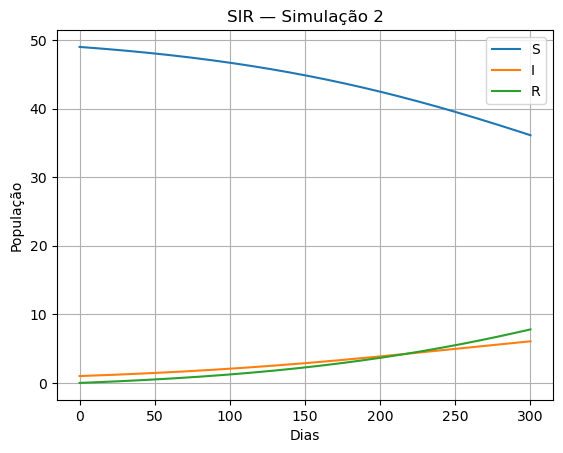

In [5]:
beta_sir2 = beta / 4
gamma_sir2 = gamma
S0, I0, R0 = 49, 1, 0
h = 0.1
t0, tn = 0, 300

def f_sir2(t, y):
    S, I, R = y
    return np.array([-beta_sir2 * S * I,
                     beta_sir2 * S * I - gamma_sir2 * I,
                     gamma_sir2 * I])

ts, ys = runge_kutta_4(f_sir2, np.array([S0, I0, R0]), t0, tn, h)

plt.plot(ts, ys[:,0], label='S')
plt.plot(ts, ys[:,1], label='I')
plt.plot(ts, ys[:,2], label='R')
plt.title("SIR — Simulação 2")
plt.xlabel("Dias")
plt.ylabel("População")
plt.grid()
plt.legend()
plt.show()


## Modelo SIRS — Simulação 1

$\nu = 1/50$. Considera reinfecção com 50 dias de imunidade média. $\beta$ reduzido.


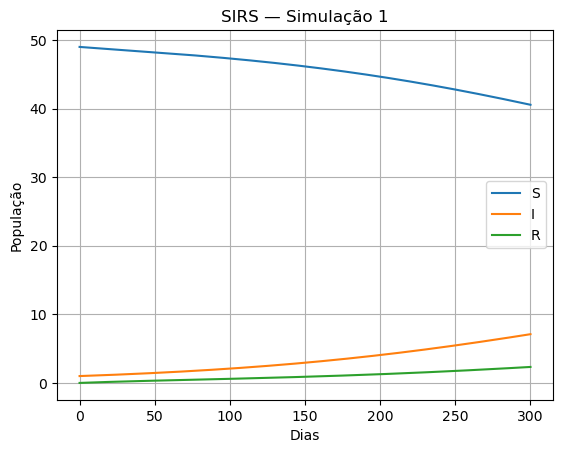

In [6]:
nu1 = 1 / 50

def f_sirs1(t, y):
    S, I, R = y
    return np.array([-beta_sir2 * S * I + nu1 * R,
                     beta_sir2 * S * I - gamma * I,
                     gamma * I - nu1 * R])

ts, ys = runge_kutta_4(f_sirs1, np.array([S0, I0, R0]), t0, tn, h)

plt.plot(ts, ys[:,0], label='S')
plt.plot(ts, ys[:,1], label='I')
plt.plot(ts, ys[:,2], label='R')
plt.title("SIRS — Simulação 1")
plt.xlabel("Dias")
plt.ylabel("População")
plt.grid()
plt.legend()
plt.show()


## Modelo SIRS — Simulação 2

Altera tempo médio de imunidade para 90 dias: $\nu = 1/90$.


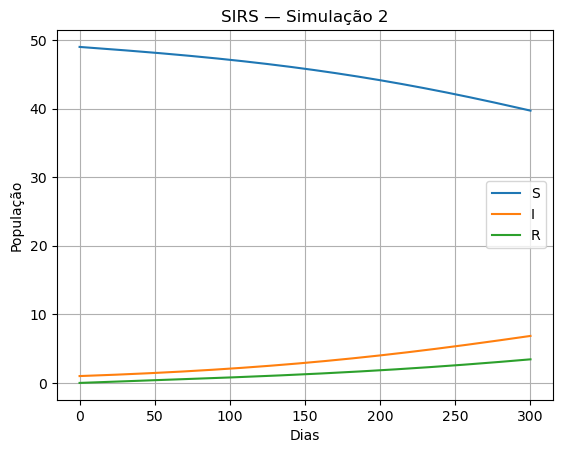

In [7]:
nu2 = 1 / 90

def f_sirs2(t, y):
    S, I, R = y
    return np.array([-beta_sir2 * S * I + nu2 * R,
                     beta_sir2 * S * I - gamma * I,
                     gamma * I - nu2 * R])

ts, ys = runge_kutta_4(f_sirs2, np.array([S0, I0, R0]), t0, tn, h)

plt.plot(ts, ys[:,0], label='S')
plt.plot(ts, ys[:,1], label='I')
plt.plot(ts, ys[:,2], label='R')
plt.title("SIRS — Simulação 2")
plt.xlabel("Dias")
plt.ylabel("População")
plt.grid()
plt.legend()
plt.show()


## Modelo SIRV — Simulação 1

Vacinação com $p = 0.0005$, imunidade média de 50 dias.


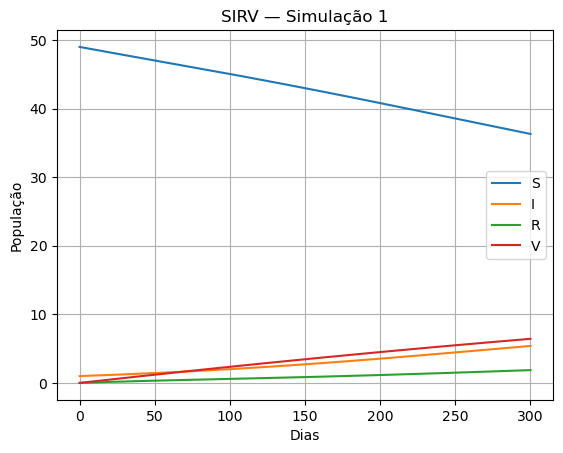

In [8]:
p1 = 0.0005
V0 = 0

def f_sirv1(t, y):
    S, I, R, V = y
    return np.array([
        -beta_sir2 * S * I + nu1 * R - p1 * S,
        beta_sir2 * S * I - gamma * I,
        gamma * I - nu1 * R,
        p1 * S
    ])

ts, ys = runge_kutta_4(f_sirv1, np.array([S0, I0, R0, V0]), t0, tn, h)

plt.plot(ts, ys[:,0], label='S')
plt.plot(ts, ys[:,1], label='I')
plt.plot(ts, ys[:,2], label='R')
plt.plot(ts, ys[:,3], label='V')
plt.title("SIRV — Simulação 1")
plt.xlabel("Dias")
plt.ylabel("População")
plt.grid()
plt.legend()
plt.show()


## Modelo SIRV — Simulação 2

Taxa de vacinação reduzida: $p = 0.0001$.


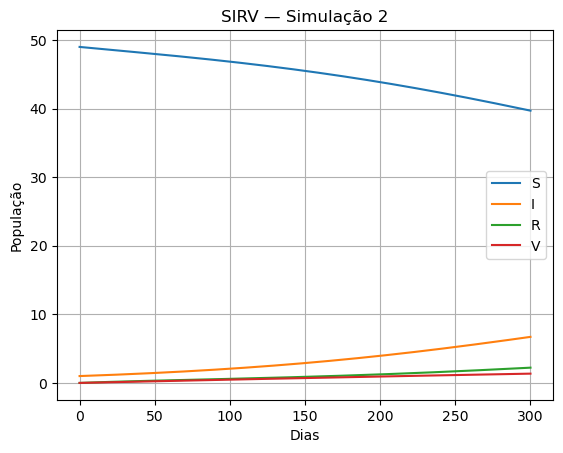

In [9]:
p2 = 0.0001

def f_sirv2(t, y):
    S, I, R, V = y
    return np.array([
        -beta_sir2 * S * I + nu1 * R - p2 * S,
        beta_sir2 * S * I - gamma * I,
        gamma * I - nu1 * R,
        p2 * S
    ])

ts, ys = runge_kutta_4(f_sirv2, np.array([S0, I0, R0, V0]), t0, tn, h)

plt.plot(ts, ys[:,0], label='S')
plt.plot(ts, ys[:,1], label='I')
plt.plot(ts, ys[:,2], label='R')
plt.plot(ts, ys[:,3], label='V')
plt.title("SIRV — Simulação 2")
plt.xlabel("Dias")
plt.ylabel("População")
plt.grid()
plt.legend()
plt.show()
